In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian_exploration import bayesian_exploration

# test function
from xopt.evaluators import test_TNK
from concurrent.futures import ThreadPoolExecutor as PoolExecutor


In [2]:
# Get VOCS
VOCS = test_TNK.VOCS
VOCS['objectives'] = {'y1' : None}

print(VOCS)
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

# Run
executor = PoolExecutor()

# Run
init_x = torch.tensor([[0.9, 0.9], [0.6, 0.6]])
results = bayesian_exploration(VOCS, EVALUATE, executor = executor,
                                 batch_size = 5,
                                 n_initial_samples=5,
                                 initial_x=None,
                                 use_gpu=False,
                                 n_steps=6, verbose=True)

{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': None}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}
tensor([[0.0000, 1.0659],
        [1.1190, 0.7238],
        [0.6571, 0.0000],
        [0.0000, 1.7109],
        [0.1859, 0.4712]], dtype=torch.float64)
tensor([[1.4522, 0.0000],
        [0.8847, 0.8201],
        [2.1245, 0.0000],
        [1.1597, 0.1787],
        [1.7701, 0.0000]], dtype=torch.float64)
tensor([[0.3523, 1.0868],
        [0.9172, 1.0255],
        [0.7714, 0.7724],
        [1.0373, 0.0971],
        [1.1356, 0.7620]], dtype=torch.float64)
tensor([[0.2510, 1.1249],
        [0.9366, 0.4453],
        [0.5632, 0.9095],
        [1.1814, 0.5898],
        [0.8000, 1.1221]], dtype=torch.float64)
tensor([[

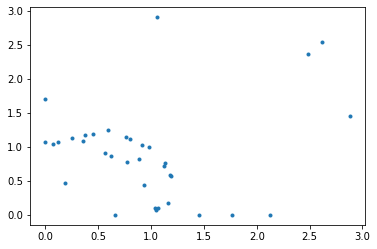

In [3]:
fig, ax = plt.subplots()
ax.plot(results['inputs'][:, 0], results['inputs'][:, 1], '.')

plt.show()